In [2]:
import os
import shutil
import datetime
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def aa(txt,out,create=True):
    whole = open(txt,'r',encoding='UTF-8')
    raw = [x for x in whole]
    raw = [x for x in raw if x[0][0]=='1']
    whole.close()

    time0 = datetime.datetime.strptime(raw[0].split()[0], '%H:%M:%S')
    time1 = datetime.datetime.strptime(raw[-1].split()[0], '%H:%M:%S')

    dif = time1-time0
    t_m = dif.total_seconds()/60
    
    clean = []
    for line in raw:
        name = ' '.join(line.split()[2:4])
        msg = ' '.join(line.split()[7:])
        clean.append([name, msg])

    for line in clean:
        if line[0].split()[1] == 'to':
            line[0] = line[0].split()[0]

    total_messages = len(clean)

    speaks = Counter([x[0] for x in clean])
    comp = pd.DataFrame.from_dict(speaks, orient='index').reset_index()
    comp.columns = ['name','msgs']
    comp = comp.sort_values(by=['name']).reset_index(drop=True)

    words = [[x[0],len(x[1].split())] for x in clean]
    peeps = list(set([x[0] for x in clean]))
    peeps_count = dict([[x,0] for x in peeps])

    for person in peeps:
        for line in words:
            if line[0]==person:
                peeps_count[person] += line[1]
    wrdct = pd.DataFrame.from_dict(peeps_count, orient='index').reset_index()
    wrdct.columns = ['name','words']
    wrdct = wrdct.sort_values(by=['name']).reset_index(drop=True)

    comp['words'] = wrdct['words']
    comp['w/m'] = comp['words'] / comp['msgs']
    comp['freq'] = comp['msgs'] / t_m

    top_msgs = comp[['name','msgs']].sort_values(by='msgs',ascending=False)[:10]
    top_words = comp[['name','words']].sort_values(by='words',ascending=False)[:10]
    top_speed = comp[['name','freq']].sort_values(by='freq',ascending=False)[:10]
    
    if create == True:
        try:
            os.makedirs(datetime.datetime.now().strftime('%d.%m.%y')+' - '+out)
        except OSError as e:
            if e.errno != errno.EEXIST:
                raise

        top_words.plot(x='name',kind='barh',title='Top ten most verbose').get_figure().savefig(datetime.datetime.now().strftime('%d.%m.%y')+' - '+out+'/'+out+'_top_words.pdf',bbox_inches='tight')
        top_msgs.plot(x='name',kind='barh',title='Top ten message writers').get_figure().savefig(datetime.datetime.now().strftime('%d.%m.%y')+' - '+out+'/'+out+'_top_messages.pdf',bbox_inches='tight')
        top_speed.plot(x='name',kind='barh',title='Top ten speediest').legend(['msgs/min']).get_figure().savefig(datetime.datetime.now().strftime('%d.%m.%y')+' - '+out+'/'+out+'_top_speed.pdf',bbox_inches='tight')
    
        shutil.copy(txt, datetime.datetime.now().strftime('%d.%m.%y')+' - '+out+'/'+txt)
        
    return comp

def auto(path,name,create=True):
    
    if create:
        aa(path,name,create)
        os.remove(path)
    else:
        return aa(datetime.datetime.now().strftime('%d.%m.%y')+' - '+name+'/'+path,name,create)

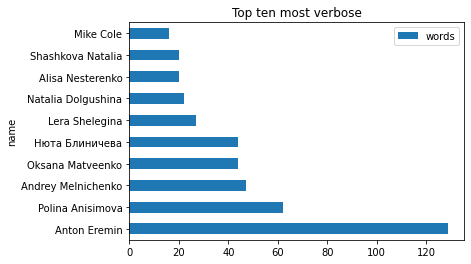

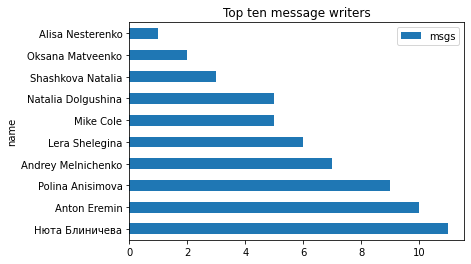

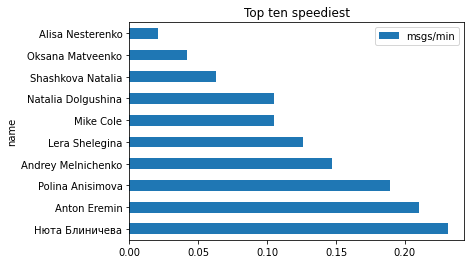

In [4]:
auto('us_biweekly.txt','us_biweekly')
